In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

this image is:  <class 'numpy.ndarray'> with dimentions:  (540, 960, 3)


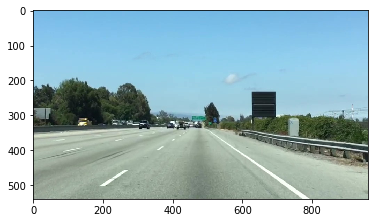

In [78]:
#read in the image and print out some stats
image = mpimg.imread('C:/Users/JERAZO/Documents/Curso-MachineLearning/test.jpg')
print('this image is: ', type(image),
      'with dimentions: ', image.shape)

#Grab the x and y size and make a copy of the image 
ysize = image.shape[0];
xsize = image.shape[1];

color_select = np.copy(image)

plt.imshow(image)
plt.show()

In [79]:
# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a change to play  with them soon in a quiz

red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

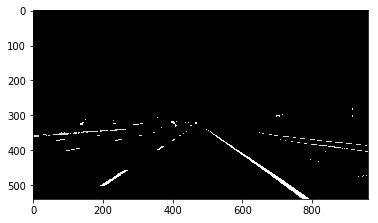

In [80]:
#After that, all pixels that meet my color criterion (those above the threshold) will be retained, and those 
#that do not (below the threshold) will be blacked out.

#Identify pixels below the threshold 

thresholds =(image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds]=[0,0,0]

#Display the image

plt.imshow(color_select)
plt.show()

In [81]:
5 >= (4 | 3) >= 4

False

In [82]:
4 | 3

7

In [83]:
color_select

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

This image is:  <class 'numpy.ndarray'> with dimentsions: (540, 960, 3)


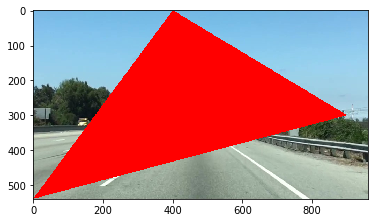

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#read the image and print some stats
image = mpimg.imread('C:/Users/JERAZO/Documents/Curso-MachineLearning/test.jpg')
print('This image is: ', type(image),
      'with dimentsions:', image.shape)

# Pull out the x and y sizes and make a copy of the image 

ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 

left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

# Fit lines (y=Ax+B) to identify the 3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

#Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

#display the image
plt.imshow(region_select)

# uncomment if plot does not display
# plt.show()

In [3]:
x = np.array([1, 2, 3, 4, 5])

y = np.array([3, 5, 7, 9, 11])

In [4]:
coefs = np.polyfit(x, y,1)
coefs

array([2., 1.])

In [5]:
ex, ey = np.meshgrid(np.arange(0, 3), np.arange(0, 3))
print(ex)
print(ey)
s = ex > ey
s

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]]


array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

# Combining Color and Region Selections

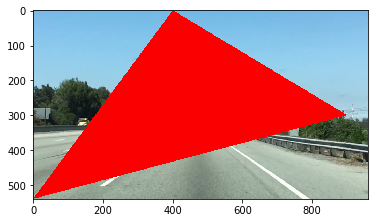

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#read in the image
image = mpimg.imread('C:/Users/JERAZO/Documents/Curso-MachineLearning/test.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.

ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

#define our color criteria

red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)

left_bottom = [0,539]
right_bottom = [900, 300]
apex = [400, 0]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold

color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                   (image[:,:,1] < rgb_threshold[1]) | \
                   (image[:,:,2] < rgb_threshold[2]) 
            
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color selection
color_select[color_thresholds] = [0,0,0]

# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [250, 0, 0]
# Display our two output images
#plt.imshow(color_select)
plt.imshow(line_image)

# uncomment if plot does not display
# plt.show()

In [23]:
True & True

True